In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("asaniczka/uk-optimal-product-price-prediction")

print("Path to dataset files:", path)

C:\Users\bruno\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 117M/117M [02:12<00:00, 926kB/s]  

Extracting files...


Path to dataset files: C:\Users\bruno\.cache\kagglehub\datasets\asaniczka\uk-optimal-product-price-prediction\versions\3


In [2]:
!pip install kagglehub



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\bruno\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('amz_uk_price_prediction_dataset.csv')
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [3]:
df.shape

(2443651, 9)

In [4]:
df.dtypes

uid                    int64
asin                  object
title                 object
stars                float64
reviews                int64
price                float64
isBestSeller            bool
boughtInLastMonth      int64
category              object
dtype: object

In [5]:
# Retrieving the unique data types present in the dataframe columns
list(set(df.dtypes.tolist()))

[dtype('bool'), dtype('int64'), dtype('O'), dtype('float64')]

In [6]:
# Checking for missing data
df.isnull().sum().sort_values(ascending=False)

uid                  0
asin                 0
title                0
stars                0
reviews              0
price                0
isBestSeller         0
boughtInLastMonth    0
category             0
dtype: int64

In [7]:
# Frequency table for 'MSZoning'
frequency_table = df['category'].value_counts()

# Calculating the proportion of each unique value in the 'MSZoning'
proportion_table = df['category'].value_counts(normalize=True)

frequency_table, proportion_table

(category
 Sports & Outdoors                         836265
 Beauty                                     19312
 Handmade Clothing, Shoes & Accessories     19229
 Bath & Body                                19092
 Birthday Gifts                             18978
                                            ...  
 Alexa Built-In Devices                       107
 Motorbike Chassis                            107
 Plugs                                        107
 Smart Home Security & Lighting               104
 Smart Speakers                                54
 Name: count, Length: 296, dtype: int64,
 category
 Sports & Outdoors                         0.342219
 Beauty                                    0.007903
 Handmade Clothing, Shoes & Accessories    0.007869
 Bath & Body                               0.007813
 Birthday Gifts                            0.007766
                                             ...   
 Alexa Built-In Devices                    0.000044
 Motorbike Chassis       

In [15]:
#agrupamos por categoría y calculamos la media de las estrellas de cada categoría
df_popular = df.groupby('category').agg({'stars': 'mean'}).sort_values('stars', ascending=False).reset_index()

df_popular_top5 = df_popular.head(5)

df_popular, df_popular_top5

(                                   category     stars
 0                       Luxury Food & Drink  4.547570
 1                                   Grocery  4.469061
 2                        Laptop Accessories  4.449600
 3                    Health & Personal Care  4.439649
 4                             Arts & Crafts  4.432663
 ..                                      ...       ...
 291                   Motorbike Instruments  0.166507
 292                  3D Printing & Scanning  0.148267
 293  Motorbike Handlebars, Controls & Grips  0.125466
 294        Motorbike Electrical & Batteries  0.097857
 295                 CD, Disc & Tape Players  0.083655
 
 [296 rows x 2 columns],
                  category     stars
 0     Luxury Food & Drink  4.547570
 1                 Grocery  4.469061
 2      Laptop Accessories  4.449600
 3  Health & Personal Care  4.439649
 4           Arts & Crafts  4.432663)

C:\Users\bruno\AppData\Local\Temp\ipykernel_35760\3034015128.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='category', y='stars', data=df_popular, palette="Set3")


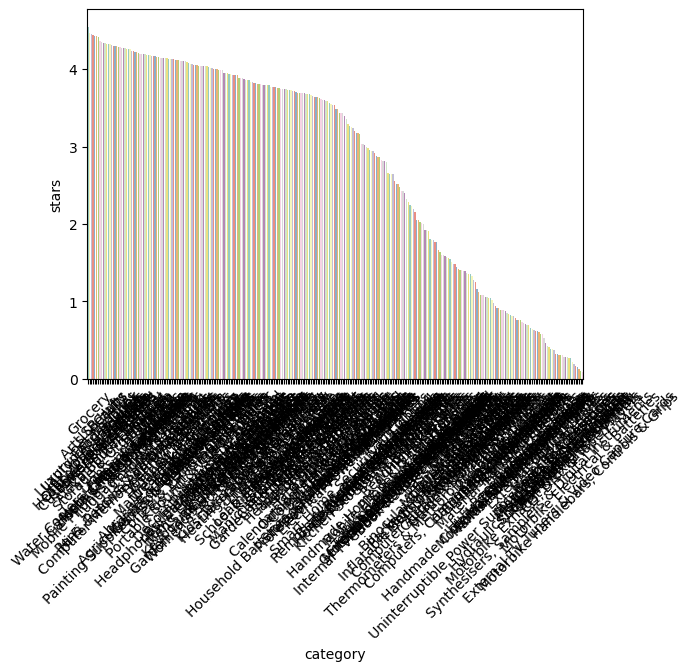

In [17]:

# Crea el gráfico de barras
sns.barplot(x='category', y='stars', data=df_popular, palette="Set3")

# Ajusta las etiquetas del eje x para que sean legibles si hay muchas categorías
plt.xticks(rotation=45)
plt.show()


C:\Users\bruno\AppData\Local\Temp\ipykernel_35760\3291006449.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='category', y='stars', data=df_popular_top5, palette="Set3")


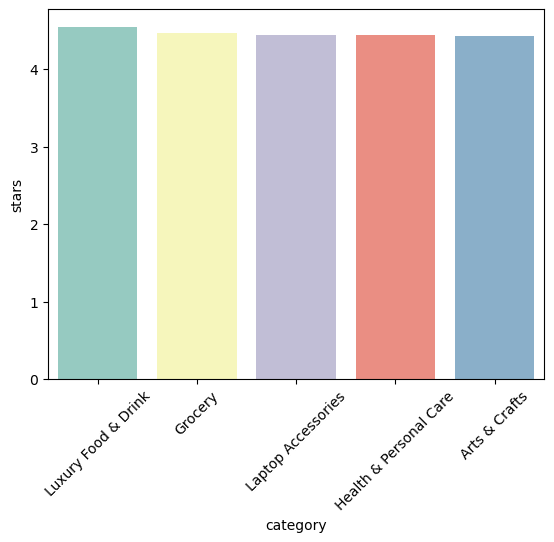

In [18]:
# Crea el gráfico de barras
sns.barplot(x='category', y='stars', data=df_popular_top5, palette="Set3")

# Ajusta las etiquetas del eje x para que sean legibles si hay muchas categorías
plt.xticks(rotation=45)
plt.show()

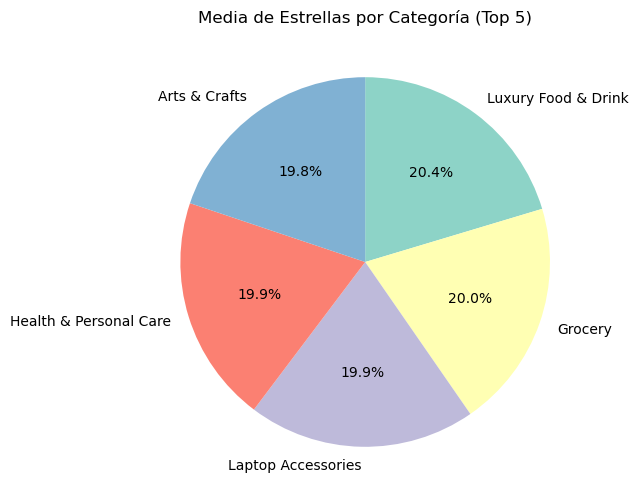

In [ ]:

# Crea el gráfico de tarta y ordena las categorías en sentido horario
plt.figure(figsize=(10, 6))
plt.pie(df_popular_top5['stars'], labels=df_popular_top5['category'], autopct='%1.1f%%', colors=plt.cm.Set3.colors, startangle=90, counterclock=False)
plt.title('Media de Estrellas por Categoría (Top 5)')
plt.show()



In [26]:
media = round(df['price'].mean(), 2)
media

89.24

In [27]:
moda = round(df['price'].mode(), 2)
moda

0    9.99
Name: price, dtype: float64

In [28]:
mediana = round(df['price'].median(), 2)
mediana

19.09

In [30]:
varianza = round(df['price'].var(), 2)
varianza

119445.49

In [31]:
des_est = round(df['price'].std(), 2)
des_est

345.61

In [32]:
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)
rango_inter = round(q3 - q1, 2)
rango_inter

36.0

In [35]:
# calculamos la raiz cuadrada del recuento del total de registros de precios

raiz = int(2443651 ** (1/2))
raiz

1563

<Axes: xlabel='price', ylabel='Count'>

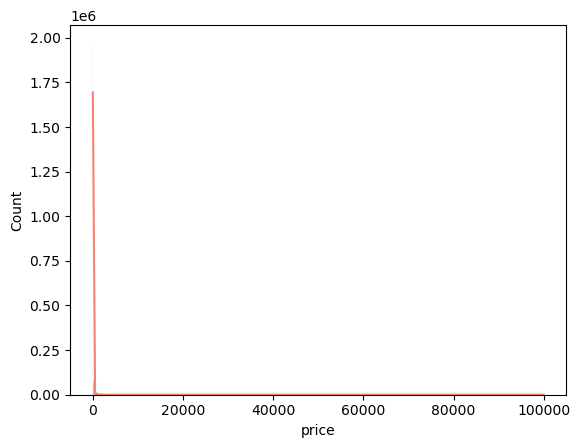

In [ ]:
# Plotting a histogram for the 'price' column of the 'data' dataframe
sns.histplot(df['price'], kde=True, bins=raiz, color="salmon")

<Axes: ylabel='price'>

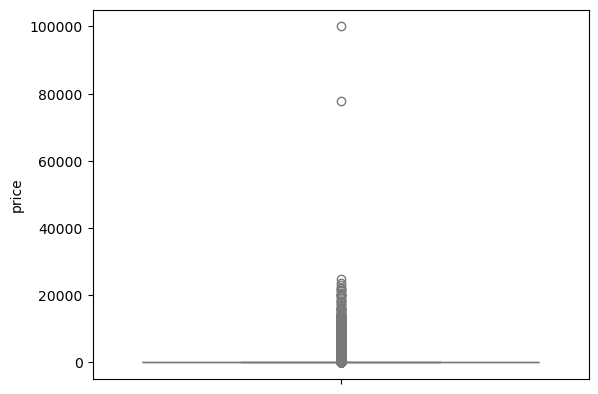

In [37]:
# Plotting a boxplot for the 'SalePrice' column with a light blue color
sns.boxplot(data = df['price'], color="lightblue")

In [38]:
media = round(df['stars'].mean(), 2)
media

2.15

In [39]:
mediana = round(df['stars'].median(), 2)
mediana

0.0

In [40]:
moda = round(df['stars'].mode(), 2)
moda

0    0.0
Name: stars, dtype: float64

In [41]:
var = round(df['stars'].var(), 2)
var

4.82

In [42]:
des_est = round(df['stars'].std(), 2)
des_est

2.19

In [43]:
q1 = df['stars'].quantile(0.25)
q3 = df['stars'].quantile(0.75)
rango_inter = round(q3 - q1, 2)
rango_inter

4.4

In [44]:
skewness_price = df['stars'].skew()
kurtosis_price = df['stars'].kurtosis()

skewness_price, kurtosis_price

(0.08120735761080985, -1.9260061280432985)

<Axes: xlabel='stars', ylabel='Count'>

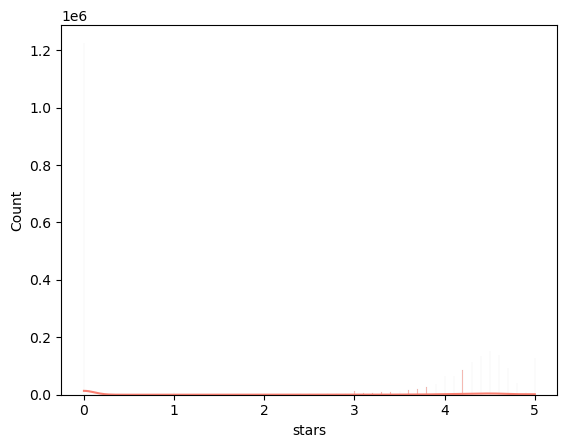

In [45]:
# Plotting a histogram for the 'stars' column of the 'data' dataframe
sns.histplot(df['stars'], kde=True, bins=raiz, color="salmon")

The variable 'price' has a large dispersion towards higher values than the central ones, with most of the prices being around 20 pounds.

The count of the variable 'stars' remains flat throughout its range, even with negative kurtosis. The 4.2-star and 0-star environments stand out. 